**Inclass: Classification Model**
- Durasi: 7 hours
- _Last Updated_: Desember 2023

___

- Disusun dan dikurasi oleh tim produk dan instruktur [Algoritma Data Science School](https://algorit.ma).

# Classification in Machine Learning

In [26]:
import pandas as pd # preprocessing data
import math # math operations
%matplotlib inline 

pd.set_option('display.max_columns', 100) # set max columns display
from matplotlib.pyplot import figure
figure(figsize=(9, 15), dpi=80)

<Figure size 720x1200 with 0 Axes>

<Figure size 720x1200 with 0 Axes>

# Introduction

* Klasifikasi bertujuan untuk memprediksi **target variable kategorik** seperti label/kelas
* Label/kelas yang dapat diprediksi antara lain berjenis 2 kelas (**binary**) atau >2 kelas (**multiclass**).

# Logistic Regression Concept

Logistic Regression merupakan salah satu metode klasifikasi yang konsepnya hampir mirip dengan regresi linear. Hanya saja, dalam logistic regression tidak menghitung secara spesifik nilai prediksi target variable, namun menghitung **kemungkinan/peluang** pada masing-masing kelas target.

- Linier regresion: y (numerik) -> **-inf, + inf**
- Logistic regression: y (peluang) -> **0, 1**

![](assets/data-science-programming-contrast-linear-logistic-regression.jpg)

📝 Hasil dari regresi logistik dapat digunakan untuk:
- keperluan interpretasi
- keperluan prediksi

❓ Bagaimana regresi logistik bekerja? 

Suatu regresi yang dapat menghasilkan nilai (-inf sd. +inf), lalu dikonversikan ke bentuk peluang (0 - 1)
  - nilai yg dihasilkan oleh algoritma logistic regression: log of odds
  - nilai dapat dikonversikan antara **log of odds** - **odds** - **peluang**:

<div>
<img src="assets/linear_vs_logistic_regression.png" width="700"/>
</div>

## Basic Intuition: Probability

* Pada dasarnya, ketika kita melakukan klasifikasi, kita mempertimbangkan **peluang**.

**Probability** : kemungkinan terjadi suatu kejadian dari seluruh kejadian yang ada.

$$P(A) = \frac{n}{S} $$ 

* $P(A)$ : peluang kejadian A
* $n$ : banyak kejadian A
* $S$ : total seluruh kejadian

💭❓ **Analytical Question**

Terdapat 100 data transaksi dari sebuah Bank, 10 diantaranya merupakan transaksi `fraud` (palsu), sedangkan sisanya sebanyak 90 adalah transaksi `not fraud`. Berapakah peluang kejadian transaksi `fraud`?

In [3]:
# probability fraud
p_fraud =  10/100
p_fraud 

0.1

📝 **Note:**  Range dari probability : **0 - 1**

## Odds 

Ketika kita menebak suatu nilai dalam regresi, range nilai yang kita tebak adalah **$-\infty - \infty$**. Sedangkan dalam klasifikasi, range nilai yang kita tebak adalah **0 - 1**. Oleh karena itu, kita memerlukan suatu jembatan untuk bisa menghubungkan antara nilai numerik menjadi suatu nilai peluang. Jembatan tersebut disebut **Odds**.

**Odds** : perbandingan probability kejadian sukses (yang diamati) dibandingkan dengan probability kejadian tidak sukses (tidak diamati)

$$Odds = \frac{p}{1-p}$$

$p$ : merupakan probability kejadian

Jika ingin mengetahui odds dari kejadian 'yes', maka:

$$Odds(yes) = \frac{p(yes)}{1-p(yes)}$$

Jika ingin mengetahui odds dari kejadian 'no' maka:

$$Odds(no) = \frac{p(no)}{1-p(no)}$$

In [4]:
# odds fraud
odds_fraud = 0.1 / 0.9
odds_fraud

0.11111111111111112

> 📈 Interpretasi: Kemungkinan/probability transaksi sebagai fraud adalah **XX KALI** lebih mungkin dibandingkan diketahui sebagai not fraud

In [5]:
# odds not fraud
odds_not_fraud = 0.9 / 0.1
odds_not_fraud

9.0

> 📈 Interpretasi: Kemungkinan jenis tanah diketahui sebagai not fraud adalah **XX KALI** lebih mungkin dibandingkan diketahui sebagai fraud

📝 **Note:**  Range dari odds : **0 - inf**

## Log of Odds

**Log of Odds** : suatu nilai odds yang di logaritmakan.

$$logit(p) = log(\frac{p}{1-p})$$

💭❓ Berapakah log of odds transaksi fraud?

In [6]:
# log of odds fraud
log_odds_fraud = math.log(0.11111111111111112)
log_odds_fraud

-2.197224577336219

 **💡Highlight Point:💡**
 
 - Untuk menginterpretasikan log of odds kedalam nilai odds -> `math.exp()`
 
 - Untuk menginterpretasikan log of odds kedalam probability -> $\frac{odds}{odds+1}$ atau 
 
```python
from scipy.special import expit
expit()
```

In [7]:
# example menginterpretasikan dari log of odds --> probability
from scipy.special import expit
expit(log_odds_fraud)

0.10000000000000002

![](assets/prob_to_logofodds_sigmoid.png)

## Logistic Regression Modeling Workflow

Berikut adalah urutan *workflow* model Logistic Regression :

1. Mempersiapkan data
2. *Exploratory Data Analysis*
3. Data *Pre-Processing*
4. Membuat model logistic regression & interpretasi
5. Melakukan prediksi
6. Model evaluasi

## Study Case : Fraud Bank Account 

Berbagai penipuan yang marak terjadi melibatkan penggunaan rekening bank. Tentunya hal ini meresahkan dan menyebabkan adanya kerugian baik untuk nasabah maupun bank ini sendiri. Kerugian ini bisa berupa kerugian material sampai menurunnya kepercayaan masyarakat terhadap suatu bank.

Data yang akan kita gunakan saat ini merupakan data akun bank yang sudah disesuaikan untuk pembelajaran di workshop ini.

### Import data

Dalam pembelajaran kali ini kita akan menggunakan data `fraud_dataset.csv` yang tersimpan pada folder `data_input`. 

Data ini dapat dieksplorasi di luar kelas, tetapi untuk kepentingan pembelajaran kita hanya akan mengambil 11 variabel yang nantinya akan digunakan pada model. Silakan jalankan kode berikut ini:

In [55]:
import pandas as pd

fraud = pd.read_csv('data_input/fraud_dataset.csv')
col_used = ['income', 'name_email_similarity', 'intended_balcon_amount', 'zip_count_4w', 
            'credit_risk_score', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 
            'proposed_credit_limit', 'source', 'fraud_bool']
fraud = fraud[col_used]

fraud.sample(3)

,income,name_email_similarity,intended_balcon_amount,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,source,fraud_bool
8890,0.2,0.812254,-1.326747,823,169.0,1,1,1,1500.0,INTERNET,0
8083,0.9,0.143784,51.139202,1333,135.0,1,1,0,200.0,INTERNET,0
758,0.8,0.737511,22.804448,1573,28.0,0,1,0,200.0,INTERNET,0


**Data Description:**

- `income` (numeric): _Annual income of the applicant (in decile form). Ranges between [0.1, 0.9]._
- `name_email_similarity` (numeric): _Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1]._
- `intended_balcon_amount` (numeric): _Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values)._
- `zip_count_4w` (numeric): _Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830]._
- `credit_risk_score` (numeric): _Internal score of application risk. Ranges between [−191, 389]._
- `phone_home_valid` (binary): _Validity of provided home phone._
- `phone_mobile_valid` (binary): _Validity of provided mobile phone._
- `has_other_cards` (binary): _If applicant has other cards from the same banking company. _
- `proposed_credit_limit` (numeric): _Applicant’s proposed credit limit. Ranges between [200, 2000]._
- `source` (categorical): _Online source of application. Either browser (INTERNET) or app (TELEAPP)._
- `fraud_bool` (binary): _If the application is fraudulent or not._


Sebelum masuk pada tahap pembuatan model, kita akan melakukan EDA untuk mengetahui variabel prediktor yang perlu dimasukkan dalam model dan yang tidak.

### Wrangling Data

#### Mengubah tipe data

Sebelum melakukan perubahan tipe data, silakan cek terlebih dahulu jenis tipe datanya dengan menggunakan method `dtypes`/`info()`

In [10]:
# code here
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 0 to 14904
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income                  14905 non-null  float64
 1   name_email_similarity   14905 non-null  float64
 2   intended_balcon_amount  14905 non-null  float64
 3   zip_count_4w            14905 non-null  int64  
 4   credit_risk_score       14905 non-null  float64
 5   phone_home_valid        14905 non-null  int64  
 6   phone_mobile_valid      14905 non-null  int64  
 7   has_other_cards         14905 non-null  int64  
 8   proposed_credit_limit   14905 non-null  float64
 9   source                  14905 non-null  object 
 10  fraud_bool              14905 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 1.3+ MB


❓ Kolom apa saja yang belum memliki tipe data yang tepat?

- `source`

In [58]:
# list berisi nama kolom yang ingin diubah dalam format sama
listkolom = ['source']

# Mengubah tipe data beberapa kolom
fraud['source'] = fraud['source'].astype('category')

# cek kembali tipe data
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 0 to 14904
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   income                  14905 non-null  float64 
 1   name_email_similarity   14905 non-null  float64 
 2   intended_balcon_amount  14905 non-null  float64 
 3   zip_count_4w            14905 non-null  int64   
 4   credit_risk_score       14905 non-null  float64 
 5   phone_home_valid        14905 non-null  int64   
 6   phone_mobile_valid      14905 non-null  int64   
 7   has_other_cards         14905 non-null  int64   
 8   proposed_credit_limit   14905 non-null  float64 
 9   source                  14905 non-null  category
 10  fraud_bool              14905 non-null  int64   
dtypes: category(1), float64(5), int64(5)
memory usage: 1.2 MB


#### Cek Missing Value & Duplicate Data

Dalam pengecekan *missing values* disediakan fungsi `isna()` yang dapat mengecek ke setiap baris data dan menunjukan *logical value*. Untuk mempermudah pengecekannya, fungsi tersebut dapat digabungkan dengan fungsi `.sum()`.

Dalam pengecekan *nilai duplikat* disediakan sebuah fungsi `duplicated()` yang dapat mengecek ke setiap baris data dan menunjukan *logical value*. Untuk mempermudah pengecekannya, fungsi tersebut dapat digabungkan dengan fungsi `.any()`.

In [59]:
# cek missing value
fraud.isna().sum()

income                    0
name_email_similarity     0
intended_balcon_amount    0
zip_count_4w              0
credit_risk_score         0
phone_home_valid          0
phone_mobile_valid        0
has_other_cards           0
proposed_credit_limit     0
source                    0
fraud_bool                0
dtype: int64

In [60]:
# cek duplicate
fraud.duplicated().any()

False

### Exploratory Data Analysis (EDA)

**Analisis `describe()`**

Pada tahapan ini kita akan mencoba untuk melakkan analisis apakah terdapat sebuah hal yang menarik dari hasil fungsi `describe()` untuk masing-masing kelas target

In [66]:
fraud.describe()

,income,name_email_similarity,intended_balcon_amount,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,fraud_bool
count,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000
mean,0.571110,0.481305,7.986892,1571.105736,136.478363,0.400671,0.883126,0.213485,551.910768,0.113116
std,0.291264,0.292755,19.702913,998.577819,73.059616,0.490051,0.321280,0.409781,516.560244,0.316746
min,0.100000,0.000093,-12.537085,36.000000,-154.000000,0.000000,0.000000,0.000000,190.000000,0.000000
25%,0.300000,0.206239,-1.173150,893.000000,85.000000,0.000000,1.000000,0.000000,200.000000,0.000000
50%,0.600000,0.472416,-0.834826,1267.000000,127.000000,0.000000,1.000000,0.000000,200.000000,0.000000
75%,0.800000,0.748003,-0.204896,1941.000000,186.000000,1.000000,1.000000,0.000000,1000.000000,0.000000
max,0.900000,0.999997,111.697355,6349.000000,378.000000,1.000000,1.000000,1.000000,2100.000000,1.000000


In [64]:
fraud[fraud['intended_balcon_amount'] < 0]

,income,name_email_similarity,intended_balcon_amount,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,source,fraud_bool
0,0.1,0.069598,-1.074674,3483,20.0,0,1,0,200.0,INTERNET,0
1,0.9,0.891741,-1.043444,2849,3.0,0,1,1,200.0,INTERNET,0
3,0.9,0.401137,-0.394588,780,74.0,0,1,0,200.0,INTERNET,0
4,0.6,0.720006,-0.487785,4527,136.0,0,1,0,200.0,INTERNET,0
5,0.4,0.241164,-1.459099,1434,144.0,1,1,1,500.0,INTERNET,0
...,...,...,...,...,...,...,...,...,...,...,...
14896,0.3,0.886668,-0.941696,922,52.0,0,1,1,200.0,INTERNET,0
14899,0.9,0.142189,-0.780839,1728,54.0,1,1,1,200.0,INTERNET,1
14900,0.9,0.225052,-0.521791,507,106.0,0,1,0,200.0,INTERNET,0
14902,0.1,0.494256,-0.973377,1177,121.0,0,1,0,200.0,INTERNET,0


In [67]:
fraud_clean = fraud.drop(columns='intended_balcon_amount')

In [65]:
fraud[(fraud['proposed_credit_limit'] < 200) |(fraud['proposed_credit_limit'] > 2000)]

,income,name_email_similarity,intended_balcon_amount,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,source,fraud_bool
3452,0.9,0.217841,-1.341128,1079,305.0,0,1,0,2100.0,INTERNET,1
4132,0.8,0.217669,-0.440791,2315,159.0,0,1,0,2100.0,INTERNET,1
6750,0.1,0.455694,20.775652,427,103.0,0,1,0,190.0,INTERNET,0
7963,0.9,0.120395,-0.656258,57,93.0,0,1,0,190.0,INTERNET,0
11876,0.6,0.881736,-0.444774,3065,109.0,0,1,1,190.0,INTERNET,0


In [68]:
fraud_clean = fraud_clean[(fraud_clean['proposed_credit_limit'] >= 200)  & (fraud_clean['proposed_credit_limit'] <= 2000)]

In [71]:
fraud_clean.shape

(14900, 10)

💭 **Insight**: Terdapat ketidaksesuaian data dengan deskripsi data terutama pada kolom `intended_balcon_amount` dan `proposed_credit_limit`

**Analisis Korelasi**

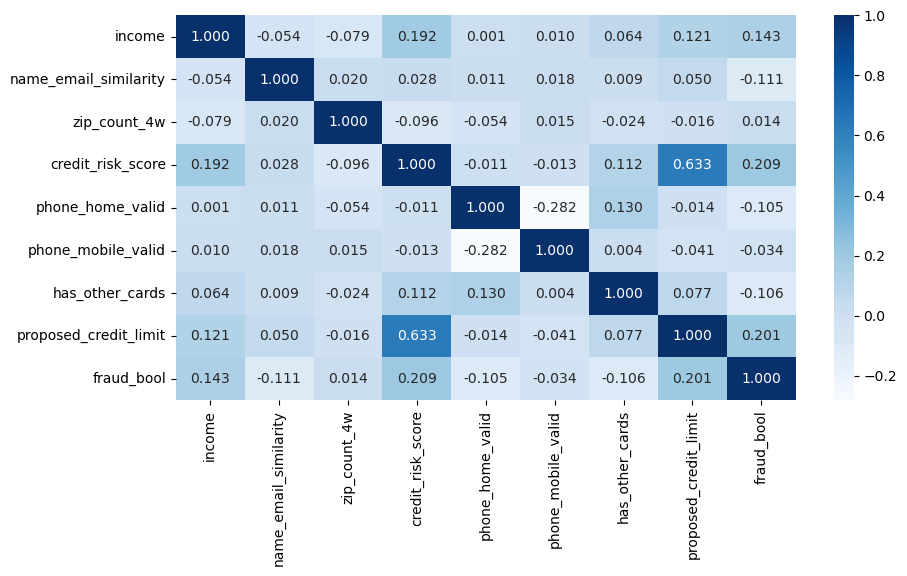

In [72]:
import seaborn as sns
import matplotlib
matplotlib.rc('figure', figsize=(10, 5)) # Buat melebarkan gambar

sns.heatmap(fraud_clean.select_dtypes(include=['int64', 'float64']).corr(), # nilai korelasi
            annot=True,   # anotasi angka di dalam kotak heatmap
            fmt=".3f",    # format 3 angka dibelakang koma 
            cmap='Blues'); # warna heatmap

###  Data Pre-Processing

Terdapat 2 hal yang biasanya dilakukan pada tahapan data pre-processing yaitu **Dummy Variable Encoding** dan juga **Cross Validation**

#### Dummy Variable Encoding 

Variabel yang kita miliki terdapat variabel dengan tipe data category, oleh karena itu kita perlu membuat dummy variabel terlebih dahulu. Untuk algoritma Logistic Regression, karena masih terdapat asumsi multicolinearity, maka yang akan dipakai adalah dummy variable. 
    
Mari lakukan metode tersebut dengan memanfaatkan fungsi berikut ini `pd.get_dummies()` dan mengisinya dengan beberapa parameter antara lain:

- `data`: data yang ingin diubah menjadi numerikal
- `columns`: list kolom yang akan dilakukan dummy variable encoding
- `drop_first`: apakah ingin drop kolom pertama. Default False. Namun akan kita atur sebagai True agar kolom hasil dummies tidak redundan
- `dtype` = memasukan tipe data yang ingin di-isi

In [74]:
# code here
fraud_enc = pd.get_dummies(data=fraud_clean,columns=['source'],drop_first=True, dtype= 'int64')
fraud_enc

,income,name_email_similarity,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,fraud_bool,source_TELEAPP
0,0.1,0.069598,3483,20.0,0,1,0,200.0,0,0
1,0.9,0.891741,2849,3.0,0,1,1,200.0,0,0
2,0.6,0.370933,406,50.0,0,1,0,200.0,0,0
3,0.9,0.401137,780,74.0,0,1,0,200.0,0,0
4,0.6,0.720006,4527,136.0,0,1,0,200.0,0,0
...,...,...,...,...,...,...,...,...,...,...
14900,0.9,0.225052,507,106.0,0,1,0,200.0,0,0
14901,0.4,0.766147,1822,130.0,0,1,0,500.0,0,0
14902,0.1,0.494256,1177,121.0,0,1,0,200.0,0,0
14903,0.7,0.051507,1176,103.0,0,1,0,200.0,1,0


#### Cross Validation

*Cross Validation* adalah metode yang kita gunakan untuk mengetahui seberapa baik performa model kita memprediksi terhadap data baru.

Lantas, bagaimana cara mengetahui apakah model yang kita buat telah baik dalam memprediksi data baru? Di sinilah mengapa kita melakukan Train-test splitting. Kita membagi data kita menjadi 2 kelompok, yaitu data `train` dan `test`.

<img src="assets/test-train.png" width="600"/>

- Data `train`: Data yang model gunakan untuk training.

- Data `test`: Data untuk evaluasi model (Untuk melihat seberapa baik model memprediksi terhadap data yang tidak digunakan untuk training)

📌 **Analogi sederhana**

- Seorang siswa dapat dikatakan pintar ketika dapat menjawab benar soal-soal ujian yang tidak pernah dikerjakannya pada soal-soal latihan untuk persiapan ujian.
- Data `train` diibaratkan soal latihan, dan data `test` diibaratkan soal ujian. Adapun `model` kita diibaratkan sebagai siswa.


Kita dapat menggunakan fungsi `train_test_split` dengan beberapa parameter sebagai berikut.
- `arrays`: dataframe yang kita gunakan (dipisah , untuk yang prediktor dan target variable)
- `test_size`: jumlah persentase dari data yang akan digunakan sebagai data test
- `train_size`: jumlah persentase dari data yang akan digunakan sebagai data test (akan otomatis terisi jika `test_size` diberi nilai)
- `random_state`: nilai random number generator (RNG). Jika kita memasukkan suatu nilai integer untuk parameter ini maka akan menghasilkan hasil yang sama untuk nilai yang sama. Jika kita mengubah nilainya, maka hasilnya akan berbeda.
- `stratify`: memastikan pembagian di data train dan test memiliki proporsi target yang sama dengan data awal

> **💡 NOTES**: Biasanya data dibagi menjadi 80:20 atau 70:30 (train size:test size). Porsi yang besar selalu digunakan untuk training

In [31]:
# Total dimensi awal sebelum split
fraud_enc.shape

(14905, 11)

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [227]:
# Tahapan 1 - Memisahkan prediktor dengan target
## prediktor
X = sm.add_constant(fraud_enc.drop(columns='fraud_bool'))

## target
Y = fraud_enc['fraud_bool']

In [228]:
# Tahapan 2 - Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, # kolom prediktor
                                                   Y, # kolom target
                                                   test_size = 0.2, # 80% training and 20% test
                                                   random_state = 10,
                                                   stratify=Y)

In [169]:
X_train.shape

(11920, 10)

In [182]:
y_train.value_counts(normalize=True)

fraud_bool
0    0.886997
1    0.113003
Name: proportion, dtype: float64

❓ **Mengapa kita perlu mengunci sifat random yang ada?**

- Agar kita mendapatkan hasil antara data train dan data test yang sama 
- Ketika kita ingin melakukan adjustment/tunning pada model yang sudah ada, data yang akan dimasukan kembali ke model tersebut sama dengan model yang sebelumnya. Sehingga kita bisa melakukan komparasi yang apple to apple terhadap kedua model tersebut.

**Cek Proporsi Kelas Target**

Setelah melakukan cross validation, kita perlu memastikan bahwa proporsi kelas target kita sudah seimbang atau belum.

❓ **Mengapa kita harus mencari tau proporsi targetnya seimbang/tidak?**

- Proporsi yang seimbang penting untuk agar model dapat mempelajari karakteristik kelas positif maupun negatif secara seimbang
- Dalam kata lain, tidak hanya belajar dari satu kelas saja. Hal ini mencegah model dari *hanya baik memprediksi 1 kelas saja*

Dalam melakukan pengecekan, pandas sudah menyediakan sebuah fungsi `crosstab()`. Pada fungsi tersebut akan di-isi dengan 3 parameter yaitu

- `index`: parameter ini akan di-isi dengan target data train kita
- `columns`: parameter ini akan di-isi dengan target variable
- `normalize`: dapat di-isi dengan True untuk menunjukan hasil dalam bentuk persentase.

In [183]:
# Code here
pd.crosstab(index = y_train, 
            columns = 'count', 
            normalize = True).round(2)

col_0,count
fraud_bool,
0,0.89
1,0.11


Proporsi yang imbalance sebenarnya cukup subjektif dan tidak ada aturan bakunya. Akan tetapi ketika proporsinya targetnya *90%:10%* atau *95%:5%*, target variable tersebut akan dianggap tidak seimbang.

**Action Plan ketika datanya imbalance:**

- Tambah data real $\rightarrow$ memerlukan waktu
- Metode *downSampling* $\rightarrow$ Membuang observasi dari kelas mayoritas, sehingga seimbang.
- Metode *upSampling* $\rightarrow$ Duplikasi observasi dari kelas minoritas, sehingga seimbang.

Metode pada poin kedua dan ketiga di atas tidak akan kita pelajari di kelas, tetapi Anda bisa membaca dokumentasinya pada link berikut: [downSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) dan [upSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html).

### Model Fitting

Untuk membuat model logistic regression, kita bisa menggunakan fungsi `Logit()` dari package `statsmodels` atau `sm`.

In [229]:
# membuat model
model_logit = sm.Logit(y_train, X_train)
model_logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.298085
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraud_bool   No. Observations:                11920
Model:                          Logit   Df Residuals:                    11910
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1550
Time:                        13:54:54   Log-Likelihood:                -3553.2
converged:                       True   LL-Null:                       -4204.8
Covariance Type:            nonrobust   LLR p-value:                6.344e-275
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8681      0.156    -18.417      0.000      -3.173      -2.563
income                    1.4400      0.121     11.898      0.000       1.203       1.677
name_email_similarity    -1.3942      0.111    -12.603      0.000      -1.611      -1.177
zip_count_4w           9.678e-05    3.1e-05      3.126      0.002    3.61e-05       0.000
credit_risk_score         0.0064      0.001     11.733      0.000       0.005       0.008
phone_home_valid         -0.7981      0.074    -10.764      0.000      -0.943      -0.653
phone_mobile_valid       -0.5900      0.095     -6.192      0.000      -0.777      -0.403
has_other_cards          -1.3055      0.103    -12.713      0.000      -1.507      -1.104
proposed_credit_limit     0.0005   6.96e-05      7.734      0.000       0.000       0.001
source_TELEAPP           -0.1356      0.491     -0.276      0.782      -1.097       0.826
=========================================================================================
"""

**Interpretasi Model**

Nilai intercept dan slope tidak bisa diinterpretasikan secara langsung karena nilainya masih berupa log of odds. Oleh karena itu, perlu dilakukan interpretasi menggunakan nilai odds. Untuk mengubah nilai log of odds menjadi odds bisa menggunakan fungsi `exp()` dari package `math`.    

In [230]:
model_logit.fit().params.values

Optimization terminated successfully.
         Current function value: 0.298085
         Iterations 7


array([-2.86808695e+00,  1.43996937e+00, -1.39418862e+00,  9.67818085e-05,
        6.43433541e-03, -7.98147401e-01, -5.89977432e-01, -1.30554459e+00,
        5.38173698e-04, -1.35643304e-01])

In [231]:
import numpy as np
np.exp(model_logit.fit().params)

Optimization terminated successfully.
         Current function value: 0.298085
         Iterations 7


const                    0.056807
income                   4.220567
name_email_similarity    0.248034
zip_count_4w             1.000097
credit_risk_score        1.006455
phone_home_valid         0.450162
phone_mobile_valid       0.554340
has_other_cards          0.271025
proposed_credit_limit    1.000538
source_TELEAPP           0.873154
dtype: float64

Hasil formula model yang diperoleh adalah sebagai berikut :

$$logit(y)= \beta_0 +\beta_1 \times x_1 + ... +\beta_n \times x_n$$

- **Interpretasi intercept/`const`**

- **Interpretasi variabel numerik**:

    -
    -

- **Interpretasi variabel kategorik**:

    -
    -

Interpretasi: ...

### Model Prediction

Ketika kita sudah berhasil membuat model, kita akan mencoba melakukan prediksi terhadap data *test* yang sudah kita persiapkan pada tahap *cross validation*

Dalam melakukan prediksi, kita bisa memanfaaatkan fungsi `predict()`. Dengan syntax sebagai berikut:

`<nama_model>.predict(<var_prediktor>)`

In [232]:
# code of predict value from model
logit_pred = model_logit.fit().predict(X_test)
logit_pred

Optimization terminated successfully.
         Current function value: 0.298085
         Iterations 7


1355     0.027437
5510     0.046101
11107    0.310836
14625    0.023955
6431     0.118358
           ...   
582      0.052350
12280    0.020636
12577    0.244421
12116    0.247063
9421     0.030503
Length: 2980, dtype: float64

Hasil prediksi yang dikeluarkan masih berupa probability dengan range 0-1. Untuk dapat mengubah nilai probability tersebut, kita bisa menetapkan threshold pada probability untuk masuk ke kelas 1 atau 0. Umumnya threshold yang digunakan yaitu 0.5. 

In [233]:
# change probability to predict class
pred_label = logit_pred.apply(lambda x: 1 if x > 0.5 else 0)
pred_label.sample(5)

11461    0
11986    0
13478    0
14160    0
10966    0
dtype: int64

### Model Evaluation

Setelah dilakukan prediksi menggunakan model, masih ada saja prediksi yang salah. Pada klasifikasi, kita mengevaluasi model berdasarkan **confusion matrix**:

- Penentuan kelas:
  + kelas positif: kelas yang lebih difokuskan 
  + kelas negatif: kelas yang tidak difokuskan
 
- Contoh kasus: 
  + Machine learning untuk deteksi pasien covid:
    * kelas positif: terdeteksi covid $\rightarrow$ Jangan sampai orang yang terkena covid dibiarkan bebas karena dapat menularkan ke orang banyak
    * kelas negatif: terdeteksi sehat
    
  + Machine learning untuk deteksi apakah seseorang bisa bayar pinjaman atau tidak
    * kelas positf: yang tidak bisa bayar $\rightarrow$ karna kita perlu berhati2 apakah nasabah tersebut bisa tidak bayar, kalo tidak bayar perusahaan bisa rugi. 
    * kelas negatif: yang bisa bayar

- Isi dari confusion matrix
    * TP (True Positive) = Ketika kita memprediksi kelas `positive`, dan benar bahwa data aktualnya `positive`
    * TN (True Negative) = Ketika kita memprediksi kelas `negative`, dan benar bahwa data aktualnya `negative`
    * FP (False Positive) = Ketika kita memprediksi kelas `positive`, namun data aktualnya `negative`
    * FN (False Negative) = Ketika kita memprediksi kelas `negative`, namun data aktualnya `positive`
    
![](assets/tnfp.PNG)

In [234]:
# confusion matrix sederhana (perbandingan antara pred label dengan data test)
pd.crosstab(y_test, pred_label)

col_0,0,1
fraud_bool,,
0,2625,18
1,306,31


* TP = 37
* TN = 2615
* FN = 29
* FP = 300

4 metrics performa model: **Accuracy, Sensitivity/Recall, Precision, Specificity**

- **Accuracy**: seberapa tepat model kita memprediksi kelas target (secara global)   
- **Sensitivity**/ **Recall**: ukuran kebaikan model terhadap kelas `positif`   
- **Specificity**: ukuran kebaikan model terhadap kelas `negatif`   
- Pos Pred Value/**Precision**: seberapa presisi model memprediksi kelas positif  

### Accuracy

Seberapa baik model kita menjelaskan kelas target (baik positif maupun negatif). Dipakai ketika kelas positif dan negatif sama pentingnya atau ketika proporsi kelas seimbang.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [235]:
# nilai akurasi
from sklearn import metrics

metrics.accuracy_score(y_test, pred_label)

0.8912751677852349

Dalam bisnis/real-case, tak selamanya kita hanya mementingkan metric accuracy. Sering kali harus memilih antara meninggikan **recall/precision**. Hal ini tergantung pada kasus bisnis/efek yang ditimbulkan dari hasil prediksi tersebut.

### Recall / Sensitivity

Seberapa banyak yang **benar diprediksi positif** dari yang **re**alitynya (aktualnya) positif.

![](assets/recall.png)

$$
Recall = \frac{TP}{TP + FN}
$$

In [236]:
# nilai recall
metrics.recall_score(y_test, pred_label)

0.09198813056379822

### Precision

Seberapa banyak yang **benar diprediksi positif** dari yang di**pre**diksi positif.

![](assets/precision.png)

$$
Precision = \frac{TP}{TP + FP}
$$

In [237]:
# nilai precision
metrics.precision_score(y_test, pred_label)

0.6326530612244898

**Cara Cepat**

Selain melakukan perhitungan manual, kita juga dapat memanfaatkan fungsi yang sudah disediakan oleh library sklearn dengan syntax 

`*_score(y_true, y_pred)`

In [238]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, pred_label)}')
print(f'Recall score: {recall_score(y_test, pred_label)}')
print(f'Precision score: {precision_score(y_test, pred_label)}')

Accuracy score: 0.8912751677852349
Recall score: 0.09198813056379822
Precision score: 0.6326530612244898


## Buatlah model dengal menghilangkan salah satu variable yang berkorelasi kuat tersebut

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
pd.Series(data=vif, index = X_train.columns).sort_values(ascending=False)

const                    23.641677
credit_risk_score         1.737997
proposed_credit_limit     1.683440
phone_home_valid          1.109834
phone_mobile_valid        1.087907
income                    1.048076
has_other_cards           1.039245
zip_count_4w              1.019992
name_email_similarity     1.006883
source_TELEAPP            1.001757
dtype: float64

In [240]:
X_train_drop = X_train.drop(columns='proposed_credit_limit')
X_test_drop = X_test.drop(columns='proposed_credit_limit')

In [241]:
X_train_drop.columns

Index(['const', 'income', 'name_email_similarity', 'zip_count_4w',
       'credit_risk_score', 'phone_home_valid', 'phone_mobile_valid',
       'has_other_cards', 'source_TELEAPP'],
      dtype='object')

In [242]:
model_logit2 = sm.Logit(y_train, X_train_drop).fit()
label_pred2 = model_logit2.predict(X_test_drop)
label_pred2 = label_pred2.apply(lambda x: 1 if x > 0.5 else 0)

Optimization terminated successfully.
         Current function value: 0.300542
         Iterations 7


In [243]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, label_pred2)}')
print(f'Recall score: {recall_score(y_test, label_pred2)}')
print(f'Precision score: {precision_score(y_test, label_pred2)}')

Accuracy score: 0.8919463087248322
Recall score: 0.0830860534124629
Precision score: 0.6829268292682927


In [249]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2)
gbc.fit(X_train, y_train)
pred3 = gbc.predict(X_test)

In [250]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, pred3)}')
print(f'Recall score: {recall_score(y_test, pred3)}')
print(f'Precision score: {precision_score(y_test, pred3)}')

Accuracy score: 0.8889261744966444
Recall score: 0.0771513353115727
Precision score: 0.5652173913043478


In [265]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred4 = xgb.predict(X_test)

In [266]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, pred4)}')
print(f'Recall score: {recall_score(y_test, pred4)}')
print(f'Precision score: {precision_score(y_test, pred4)}')

Accuracy score: 0.886241610738255
Recall score: 0.1543026706231454
Precision score: 0.49056603773584906


In [271]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define grid
weights = [0.1, 0.25, 0.5, 0.66, 1, 10, 25, 50, 99]
param_grid = dict(scale_pos_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy')

In [274]:
%%time
grid_result = grid.fit(X_train, y_train)
pred5 = grid.predict(X_test)

CPU times: total: 1.39 s
Wall time: 3.2 s


In [275]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, pred5)}')
print(f'Recall score: {recall_score(y_test, pred5)}')
print(f'Precision score: {precision_score(y_test, pred5)}')

Accuracy score: 0.6758389261744966
Recall score: 0.543026706231454
Precision score: 0.18391959798994975



Ketika tidak puas dengan hasil model performance diatas, yang bisa dilakukan adalah:

1. Tunning model (membuat model baru dengan kombinasi prediktor yang lain)
2. Menambahkan data
3. Melakukan penggeseran threshold
4. Menggunakan metode yang lain

### Asumsi Logistic Regression

Asumsi Logistic Regression :

* **No Multicollinearity**: antar prediktor tidak saling berkorelasi. Untuk melakukan pengecekannya sama seperti dalam linear regression yaitu menggunakan nilai VIF. 

  + apabila ada prediktor yang terindikasi multikolinearity, kita bisa menggunakan salah satu variabel saja atau membuat variabel baru yang men-summary dari kedua variabel tersebut (mean)
  +  dari VIF kita ingin variabel kita memiliki VIF < 10
  
* **Independence of Observations**: antar observasi saling independen & tidak berasal dari pengukuran berulang (repeated measurement).

* **Linearity of Predictor & Log of Odds**: cara interpretasi mengacu pada asumsi ini. untuk variabel numerik, peningkatan 1 nilai akan menaikan log of odds (peluang).

# K-Nearest Neighbour Algorithm

Metode k-NN akan mengkasifikasi data baru dengan membandingkan karakteristik data baru (data test) dengan data yang ada (data train). Kedekatan karakteristik tersebut diukur dengan Euclidean Distance yaitu pengukuran jarak. Kemudian akan dipilih k tetangga terdekat dari data baru tersebut, kemudian ditentukan kelasnya menggunakan majority voting.

### Karakteristik k-NN

- tidak ada asumsi
- dapat memprediksi multiclass
- baik untuk prediktor numerik (karena mengklasifikasikan berdasarkan jarak), tidak baik untuk prediktor kategorik
- robust: performa nya bagus -> error nya kecil
- tidak interpretable

## Data Cleansing

Kita akan menggunakan data yang sama dengan metode sebelumnya, tetapi kali ini kita akan menggunakan data tanpa kategorikal sama sekali.

In [128]:
fraud_enc.head(3)

,income,name_email_similarity,zip_count_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,fraud_bool,source_TELEAPP
0,0.1,0.069598,3483,20.0,0,1,0,200.0,0,0
1,0.9,0.891741,2849,3.0,0,1,1,200.0,0,0
2,0.6,0.370933,406,50.0,0,1,0,200.0,0,0


In [127]:
fraud_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14900 entries, 0 to 14904
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 14900 non-null  float64
 1   name_email_similarity  14900 non-null  float64
 2   zip_count_4w           14900 non-null  int64  
 3   credit_risk_score      14900 non-null  float64
 4   phone_home_valid       14900 non-null  int64  
 5   phone_mobile_valid     14900 non-null  int64  
 6   has_other_cards        14900 non-null  int64  
 7   proposed_credit_limit  14900 non-null  float64
 8   fraud_bool             14900 non-null  int64  
 9   source_TELEAPP         14900 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [277]:
catbool = ['phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'source_TELEAPP']

In [278]:
fraud_knn = fraud_enc.drop(columns=catbool)

fraud_knn.head()

,income,name_email_similarity,zip_count_4w,credit_risk_score,proposed_credit_limit,fraud_bool
0,0.1,0.069598,3483,20.0,200.0,0
1,0.9,0.891741,2849,3.0,200.0,0
2,0.6,0.370933,406,50.0,200.0,0
3,0.9,0.401137,780,74.0,200.0,0
4,0.6,0.720006,4527,136.0,200.0,0


## Cross Validation

Gunakan metode train-test splitting dengan proporsi dan random_state yang sudah kita gunakan pada kasus sebelumnya.

In [296]:
# prediktor
X = fraud_knn.drop(columns='fraud_bool')
# target
y = fraud_knn['fraud_bool']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, # kolom prediktor
                                                   y, # kolom target
                                                   test_size = 0.2, # 80% training and 20% test
                                                   random_state = 10,
                                                   stratify = y)

In [281]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
pd.Series(data=vif, index = X_train.columns).sort_values(ascending=False)

credit_risk_score        6.586484
income                   3.779879
proposed_credit_limit    3.572963
name_email_similarity    2.967258
zip_count_4w             2.653914
dtype: float64

## Data Preprocessing

**Feature Scalling**

🔎 Scaling: menyamaratakan range variable prediktor

Scaling bisa menggunakan **min-max normalization atau z-score standarization**

1.  **Min-max normalization** --> bekerja dengan mentransformasi fitur sehingga nilainya berada dalam rentang 0 hingga 1.

> Formula: $x_{new}=\frac{(x-min(x))}{(max(x)-min(x))}$

- Nilai fitur yang dinormalisasi secara efektif mengomunikasikan seberapa jauh, dalam persentase, nilai asli berada di sepanjang rentang semua nilai fitur *x*.
- digunakan ketika tau angka pasti min dan max nya. misalnya nilai ujian matematika pasti nilai min-max nya 0 - 100.

2. **z-score standardization** mengurangi fitur x dengan rata-rata dan dibagi dengan standar deviasi dari fitur.

> Formula: $x_{new}=\frac{(x-\bar x)}{std(x)}$ 

- digunakan ketika tidak diketahui angka min dan max pastinya. misalnya temperature bisa dari kisaran -inf s.d +inf



🔻 Menormalisasi menjadi z-score:

In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [283]:
# subset kolom numerik
cols = X_train.columns

In [284]:
# transform
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Data prediktor discaling menggunakan z-score standarization. Data test juga harus discaling menggunakan parameter dari data train (karena menganggap data test adalah unseen data).

Untuk data test:
- diperlakukan sebagai data unseen
- ketika ingin discaling prediktornya harus menggunakan informasi mean dan sd dari data train

## Training Model

Untuk membuat model K-NN, kita akan memanfaatkan library `KNeighborsClassifier` yang berada pada `sklearn.neighbors`. Tetapi sebelumnya kita harus menentukan dulu jumlah tetangga yang harus kita perhitungkan.

### Choosing an appropriate *k*

Berikut adalah intuisi dasar pemilihan nilai K optimal:

- Jangan terlalu besar: pemilihan kelas hanya berdasarkan kelas yang dominan dan mengabaikan data kecil yang ternyata penting.
- Jangan terlalu kecil: rentan mengklasifikasikan data baru ke kelas outlier.
- Penentuan k optimum biasanya menggunakan akar dari jumlah data train kita: `sqrt(nrow(data))`

In [285]:
math.sqrt(fraud_clean.shape[0])

122.06555615733703

k-NN akan menghitung jumlah kelas pada tetangga terdekat suatu data dan kelas terbanyak inilah akan menjadi hasil klasifikasi data kita. Bila hasil majority voting seri, maka kelas akan dipilih secara random. Maka dari itu, untuk meminimalisir seri ketika majority voting:

+ k harus ganjil bila jumlah kelas target genap
+ k harus genap bila jumlah kelas target ganjil
+ k tidak boleh angka kelipatan jumlah kelas target

Nilai hasil perhitungan di atas perlu dibulatkan berdasarkan arahan ini. Mari kita gunakan nilainya pada pembuatan model k-NN.

In [297]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=123)
model_knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=123)

## Model prediction
Sama seperti model sebelumnya, model yang sudah dipersiapkan untuk melakukan prediksi pada data test yang sudah dipersipakan dengan menggunakan fungsi `predict()`.

In [298]:
knn_pred = model_knn.predict(X_test_scale)

### Model Evaluation

In [299]:
# Hasil evaluasi KNN
print(f'Accuracy score: {accuracy_score(y_test, knn_pred)}')
print(f'Recall score: {recall_score(y_test, knn_pred)}')
print(f'Precision score: {precision_score(y_test, knn_pred)}')

Accuracy score: 0.8889261744966444
Recall score: 0.026706231454005934
Precision score: 0.75


# Logistic Regression & k-NN Comparation

![](assets/Karakter.png)

# Glossary & Additional Information

<details>
    <summary>Click once on <font color="red"><b>this text</b></font> to hide/unhide additional information in Summary</summary>
    
**[Optional] Other Information in Summary**

1. Tabel 1, sisi kiri menyimpan informasi dasar dari model

| Variable | Description | 
| :--- | :--- | 
| Dep. Variable  | Dependent variable atau target variabel (Y) | 
| Model | Model logistic regression| 
| Method | Metode yang digunakan untuk membuat model logistic regression: Maximum Likelihood Estimator | 
| No. Observations| Jumlah observasi (baris) yang digunakan ketika membuat model regresi linier | 
| DF Residuals | Degrees of freedom error/residual (jumlah observasi/baris - parameter) |
| DF Model  | Degrees of freedom model (jumlah prediktor) | 
| Covariance type | tipe nonrobust berarti tidak ada penghapusan data untuk menghitung kovarian antar fitur. Kovarian menunjukkan bagaimana dua variabel bergerak terhadap satu sama lain (+ atau -, tidak menghitung kekuatannya) | 
    
    
<br> 
<br>  

2. Tabel 1, sisi kanan menyimpan informasi kebaikan model

| Variable | Description | 
| :--- | :--- | 
| Pseudo R-squared  | Goodness of fit. Rasio dari log-likelihood null model dibandingkan dengan full model. | 
| Log-likelihood  | [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) bahwa data yang digunakan cocok/fit dengan model. Semakin besar, semakin fit model terhadap datanya. range -inf - +inf  |
| LL-Null | nilai dari log-likelihood model tanpa prediktor (intercept saja) | 
| LLR p-value   | nilai p -value dari apakah model yang kita buat lebih baik daripada model tanpa prediktor (intercept saja)| 


<br> 
<br> 

3. Tabel 2 menyimpan informasi dari koefisien regresi

| Variable | Description | 
| :--- | :--- | 
| **coef**   | Estimasi koefisien | 
| std err | Estimasi selisih nilai sampel terhadap populasi | 
| z | Statistik hitung dari z-test (uji parsial) | 
|**P > \|z\|**  | P-value dari z-test | 
| [95.0% Conf. Interval]  | Confidence Interval (CI) 95%. |

    
In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.
    
<br> 
<br> 
    
    
    
Recall from Practical Statistic:
    
* $\alpha$:
  + tingkat signifikansi / tingkat error
  + umumnya 0.05
* $1-\alpha$: tingkat kepercayaan (misal alpha 0.05, maka kita akan percaya terhadap hasil analisis sebesar 95%)
* $p-value$:
  + akan dibandingkan dengan alpha untuk untuk mengambil keputusan
  + peluang data sampel berada pada bagian sangat ekstrim/berbeda signifikan dengan keadaan normal.
  
Pengambilan keputusan:

* Jika $p-value$ < $\alpha$, maka tolak $H_0$ / terima $H_1$
* Jika $p-value$ > $\alpha$, maka gagal tolak / terima $H_0$
    
</details>